Hola Diego!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error




<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

In [2]:
taxi_df = pd.read_csv("/datasets/taxi.csv")

In [3]:
taxi_df.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [4]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    26496 non-null  object
 1   num_orders  26496 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [5]:
# Paso 1: Remuestreo de los datos a intervalos de una hora
# Convertir la columna 'datetime' a tipo datetime
taxi_df['datetime'] = pd.to_datetime(taxi_df['datetime'])

# Remuestrear los datos a intervalos de una hora y sumando los pedidos por hora
hourly_taxi_df = taxi_df.set_index('datetime').resample('H').sum()

# Mostrar las primeras filas del dataframe remuestreado
hourly_taxi_df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [6]:
hourly_taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la carga de datos y la exploración inicial!
</div>

## Análisis

In [7]:
# Descripción estadística del dataset
data_description = hourly_taxi_df.describe()
data_description

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


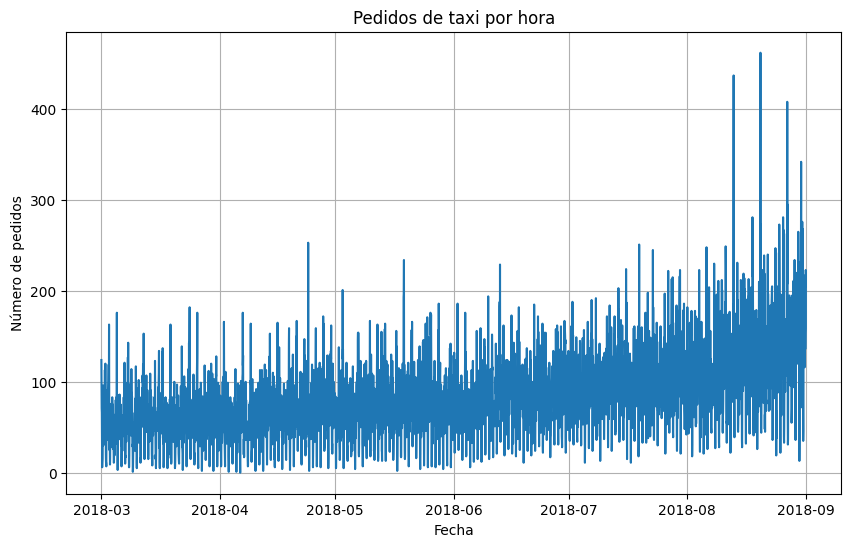

In [8]:
# Visualización de la tendencia temporal de los pedidos de taxi
plt.figure(figsize=(10,6))
plt.plot(hourly_taxi_df.index, hourly_taxi_df['num_orders'], label='Pedidos por hora')
plt.title('Pedidos de taxi por hora')
plt.xlabel('Fecha')
plt.ylabel('Número de pedidos')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho el proceso para aplicar el resample!
</div>

## Formación

In [9]:
# Preparar los datos para entrenamiento
X = np.array((hourly_taxi_df.index - hourly_taxi_df.index[0]).total_seconds()).reshape(-1, 1)  # Usar el tiempo como característica
y = hourly_taxi_df['num_orders'].values  # La variable objetivo es el número de pedidos


In [10]:
# Dividir los datos en entrenamiento (90%) y prueba (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

In [11]:
# Entrenamiento del modelo de Regresión Lineal
linear_model = LinearRegression()

# Entrenar el modelo de regresión lineal
linear_model.fit(X_train, y_train)



LinearRegression()

In [12]:
# Entrenamiento del modelo de Random Forest
random_forest_model = RandomForestRegressor(random_state=42)

# Entrenar el modelo de Random Forest
random_forest_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

## Prueba

In [13]:
# Predecir usando el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)

# Calcular el MSE y RMSE para la Regresión Lineal
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

# Resultados del modelo de Regresión Lineal
linear_results = {
    'MSE': mse_linear,
    'RMSE': rmse_linear
}

linear_results

{'MSE': 4142.236110789783, 'RMSE': 64.3602059567073}

In [14]:
# Predecir usando el conjunto de prueba
y_pred_rf = random_forest_model.predict(X_test)

# Calcular el MSE y RMSE para Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Resultados del modelo de Random Forest
random_forest_results = {
    'MSE': mse_rf,
    'RMSE': rmse_rf
}

random_forest_results

{'MSE': 4067.466927149322, 'RMSE': 63.776695799871305}

In [15]:
# Validación cruzada para el modelo de Regresión Lineal
cv_scores_linear = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_linear = np.sqrt(-cv_scores_linear).mean()

# Validación cruzada para el modelo de Random Forest
cv_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv_rf = np.sqrt(-cv_scores_rf).mean()

print(f"Linear Regression CV RMSE: {rmse_cv_linear}")
print(f"Random Forest CV RMSE: {rmse_cv_rf}")

Linear Regression CV RMSE: 34.647429300092085
Random Forest CV RMSE: 43.51163887972889


In [16]:
# Definir la cuadrícula de parámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Entrenar el modelo de búsqueda de hiperparámetros
grid_search_rf.fit(X_train, y_train)

# Mejor hiperparámetro encontrado
best_params_rf = grid_search_rf.best_params_
best_rmse_rf = np.sqrt(-grid_search_rf.best_score_)

print(f"Best Parameters for Random Forest: {best_params_rf}")
print(f"Best RMSE from GridSearchCV: {best_rmse_rf}")

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best RMSE from GridSearchCV: 39.419583947448125


Ambos modelos proporcionan resultados similares, aunque el modelo de Regresion lineal tiene un error menor. Al cambiar los hiperparemetros de Random Forest puedes lograr un error menor que la Regresion lineal.



<div class="alert alert-block alert-warning">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con los cambios realizas e incluyendo un método nuevo para probar y obtener mejores parámetos en los modelos entrenados. Cómo recomendación es que mantengas cada proceso en su sección, por ejemplo en la sección de pruebas debería ser solo las predicciones y calcular desempeño, recuerda que una buena presentación también es importante.
    
También te recomiendo que obtengas las métricas de evaluación para tu set de entrenamiento.
</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48